# Candidate admittance testing

Test how the ranking and admittance of candidates is affected by the models that rank candidates and the admittance criteria.


- Compare selection of top 1% candidates by RandomBaseline ranking with random selection of 1% of candidates.
- Compare ranking by ComplEx with ranking of Randombaseline.


In [1]:
import models
import numpy as np
import pandas as pd
import config
from candidate_ranking import rank_candidates, admit_candidates
from kb_extension import extend_kb
from candidate_generation import generate_candidate_triples

import matplotlib.pyplot as plt
import seaborn as sns

# file imports
#original_kb = np.loadtxt("family_subset.txt", dtype = 'object')

WARNING - All triples will be processed in the same batch (batches_count=1). When processing large graphs it is recommended to batch the input knowledge graph instead.


In [3]:
kb_extensions = pd.read_pickle("./kb_extensions.pkl")

In [9]:
parameter_combinations = pd.read_pickle("./parameter_combinations.pkl")

In [12]:
# add extensions to parameter combination dataframe
parameter_combinations["kb_extension"] = kb_extensions

In [73]:
complEx_rank_1 = parameter_combinations.loc[(parameter_combinations.Model == 'ComplEx') & (parameter_combinations.Entity_selection == 'probabilistic') & (parameter_combinations.Candidate_criteria == ('rank_cutoff',1))]
randomBaseline_rank_1 = parameter_combinations.loc[(parameter_combinations.Model == 'RandomBaseline') & (parameter_combinations.Entity_selection == 'probabilistic') & (parameter_combinations.Candidate_criteria == ('rank_cutoff',1))]

complEx_rank_1_extension = complEx_rank_1.iloc[0].kb_extension
randomBaseline_rank_1_extension = randomBaseline_rank_1.iloc[0].kb_extension

common_rank_1_candidates = pd.DataFrame(complEx_rank_1_extension).merge(pd.DataFrame(randomBaseline_rank_1_extension), "inner")

print("Number of common rank 1 candidates:", len(common_rank_1_candidates))

Number of common rank 1 candidates: 0


In [76]:
complEx_rank_4 = parameter_combinations.loc[(parameter_combinations.Model == 'ComplEx') & (parameter_combinations.Entity_selection == 'probabilistic') & (parameter_combinations.Candidate_criteria == ('rank_cutoff',4))]
randomBaseline_rank_4 = parameter_combinations.loc[(parameter_combinations.Model == 'RandomBaseline') & (parameter_combinations.Entity_selection == 'probabilistic') & (parameter_combinations.Candidate_criteria == ('rank_cutoff',4))]

complEx_rank_4_extension = complEx_rank_4.iloc[0].kb_extension
randomBaseline_rank_4_extension = randomBaseline_rank_4.iloc[0].kb_extension

common_rank_4_candidates = pd.DataFrame(complEx_rank_4_extension).merge(pd.DataFrame(randomBaseline_rank_4_extension), "inner")

print("Number of common rank 4 candidates:", len(common_rank_4_candidates))

Number of common rank 4 candidates: 1


WARNING - No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


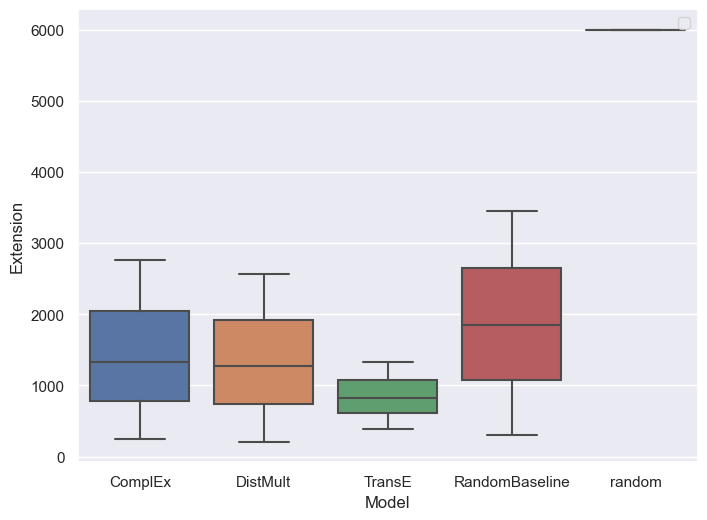

In [75]:
plt.subplots(figsize=(8,6), dpi=100)
ax = sns.boxplot(x="Model", y="Extension", data=extension_sizes)
#plt.axhline(original_rules_median_PCA, color="black", label="Median original rules", linestyle="--")
plt.legend()

In [12]:
extended_kb, admitted_candidates = extend_kb(original_kb, models.complEx, "probabilistic", ("random", 0), max_entities=config.max_entities)
admitted_w_parameters = pd.DataFrame([[len(admitted_candidates), models.complEx.name, method, criteria]], columns=["Extension", "Model", "Entity_selection", "Candidate_criteria"])
extension_sizes = extension_sizes.append(admitted_w_parameters)

/Home/siv30/fak006/miniconda/envs/ampligraph/lib/python3.7/site-packages/ampligraph/latent_features/models/EmbeddingModel.py:1329: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if corruption_entities == 'all':
100%|██████████| 60000/60000 [00:35<00:00, 1667.52it/s]


NameError: name 'model' is not defined

In [20]:
admitted_w_parameters = pd.DataFrame([[len(admitted_candidates), "random", "probabilistic", ("random", 0)]], columns=["Extension", "Model", "Entity_selection", "Candidate_criteria"])
extension_sizes = extension_sizes.append(admitted_w_parameters)

In [21]:
extension_sizes

,Extension,Model,Entity_selection,Candidate_criteria
0,253,ComplEx,probabilistic,"(rank_cutoff, 1)"
0,1324,ComplEx,probabilistic,"(rank_cutoff, 4)"
0,2766,ComplEx,probabilistic,"(rank_cutoff, 7)"
0,210,DistMult,probabilistic,"(rank_cutoff, 1)"
0,1271,DistMult,probabilistic,"(rank_cutoff, 4)"
0,2567,DistMult,probabilistic,"(rank_cutoff, 7)"
0,386,TransE,probabilistic,"(rank_cutoff, 1)"
0,830,TransE,probabilistic,"(rank_cutoff, 4)"
0,1325,TransE,probabilistic,"(rank_cutoff, 7)"
0,308,RandomBaseline,probabilistic,"(rank_cutoff, 1)"


In [ ]:
# add rules mined from randomly selected candidates
extended_kb, admitted_candidates = extend_kb(original_kb, models.complEx, "probabilistic", ("random", 0), max_entities=config.max_entities)
rules = rule_mining(extended_kb)
number_of_rules = len(rules)
parameter_list = ["Rand cand","Rand cand","Rand cand"]
parameter_full = [parameter_list for j in range(number_of_rules)]
parameter_full_df = pd.DataFrame(parameter_full, columns=["Model", "Entity_selection", "Candidate_criteria"])
original_rules_parameters= pd.concat([rules, parameter_full_df], axis=1)
original_rules_parameters['PCA Confidence'] = original_rules_parameters['PCA Confidence'].apply(lambda x: float(x.replace(',','.')))
original_rules_parameters['Head Coverage'] = original_rules_parameters['Head Coverage'].apply(lambda x: float(x.replace(',','.')))
#mined_rules.append(original_rules_parameters)
mined_rules_parameters = pd.concat([mined_rules_parameters,original_rules_parameters])

## Compare ranking by ComplEx with ranking of Randombaseline.

In [1]:
from scipy import stats
family_relations = ["child", "sibling", "mother", "father", "relative", "spouse"]


In [2]:
candidates, entities = generate_candidate_triples(original_kb, entities=None, entity_selection_method="probabilistic", max_entities=100, relations=family_relations, savefile_name=None)

NameError: name 'generate_candidate_triples' is not defined

In [32]:
complEx_ranked = rank_candidates(models.complEx, candidates, original_kb, entities)

/Home/siv30/fak006/miniconda/envs/ampligraph/lib/python3.7/site-packages/ampligraph/latent_features/models/EmbeddingModel.py:1329: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if corruption_entities == 'all':
100%|██████████| 59998/59998 [00:36<00:00, 1634.84it/s]


In [41]:
complEx_ranked['Model']='complEx'

In [33]:
randomBaseline_ranked = rank_candidates(models.randomBaseline, candidates, original_kb, entities)

In [42]:
randomBaseline_ranked['Model']='randomBaseline'

In [37]:
randomBaseline_ranked["Sub_rank"].values

array([64, 26, 35, ..., 81,  2, 33], dtype=int32)

In [46]:
combined = pd.concat([complEx_ranked, randomBaseline_ranked], ignore_index=True)

In [39]:
stats.spearmanr(randomBaseline_ranked["Sub_rank"].values, complEx_ranked["Sub_rank"].values)

SpearmanrResult(correlation=0.004578933897997838, pvalue=0.2620457471935607)

In [40]:
stats.spearmanr(randomBaseline_ranked["Obj_rank"].values, complEx_ranked["Obj_rank"].values)

SpearmanrResult(correlation=0.0026169844479070514, pvalue=0.5215196197594257)

In [47]:
combined

,Object,Predicate,Subject,Sub_rank,Obj_rank,Model
0,Q570989,sibling,Q64215,37,33,complEx
1,Q570989,child,Q353816,36,27,complEx
2,Q550652,child,Q15433864,96,76,complEx
3,Q3041265,relative,Q271856,26,19,complEx
4,Q16914031,spouse,Q476670,16,21,complEx
...,...,...,...,...,...,...
119991,Q16867,relative,Q3154738,97,96,randomBaseline
119992,Q13129206,spouse,Q203829,37,48,randomBaseline
119993,Q6790615,child,Q182019,81,84,randomBaseline
119994,Q476670,child,Q333182,2,2,randomBaseline


<Figure size 1080x576 with 0 Axes>

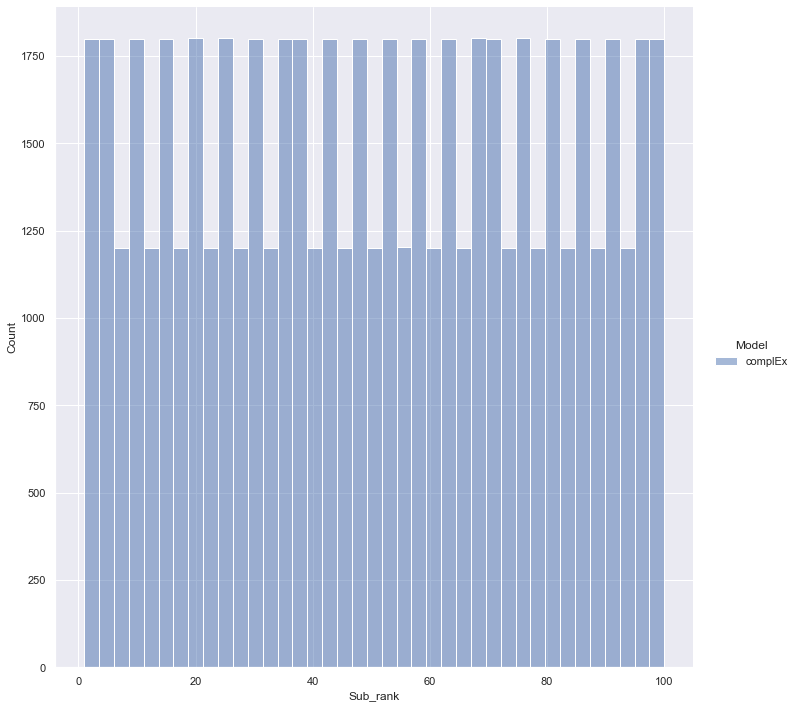

In [73]:
plt.figure(figsize = (15,8))
sns.displot(complEx_ranked, x="Sub_rank", hue="Model", height=10)

<Figure size 1080x576 with 0 Axes>

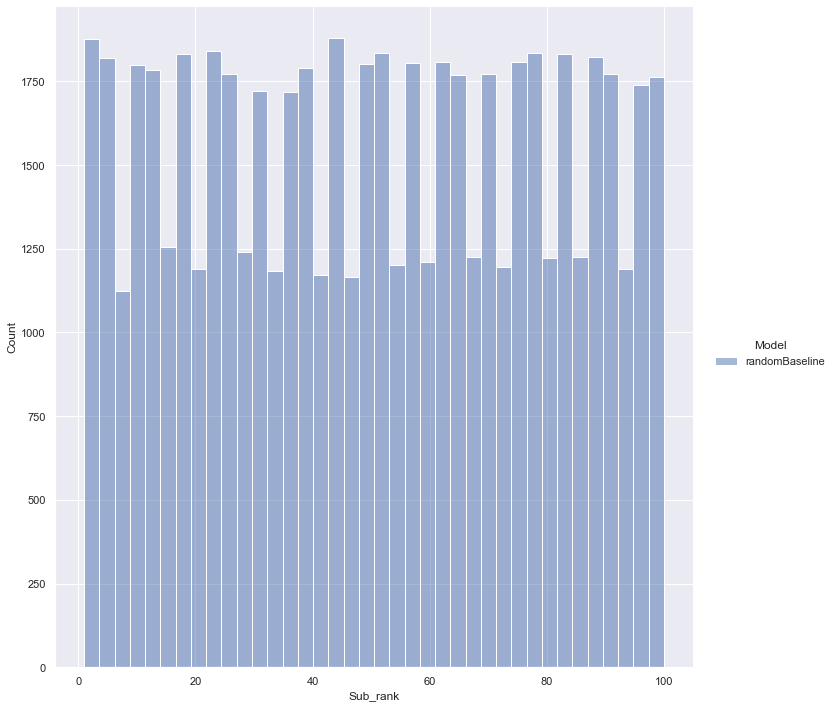

In [63]:
plt.figure(figsize = (15,8))
sns.displot(randomBaseline_ranked, x="Sub_rank", hue="Model", height=10)

In [ ]:
transE_ranked = rank_candidates(models.transE, candidates, original_kb, entities)

/Home/siv30/fak006/miniconda/envs/ampligraph/lib/python3.7/site-packages/ampligraph/latent_features/models/EmbeddingModel.py:1329: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if corruption_entities == 'all':


In [ ]:
plt.figure(figsize = (15,8))
sns.displot(transE_ranked, x="Sub_rank", hue="Model", height=10)

In [ ]:
distMult_ranked = rank_candidates(models.distMult, candidates, original_kb, entities)

In [ ]:
plt.figure(figsize = (15,8))
sns.displot(distMult_ranked, x="Sub_rank", hue="Model", height=10)

<Figure size 1080x576 with 0 Axes>

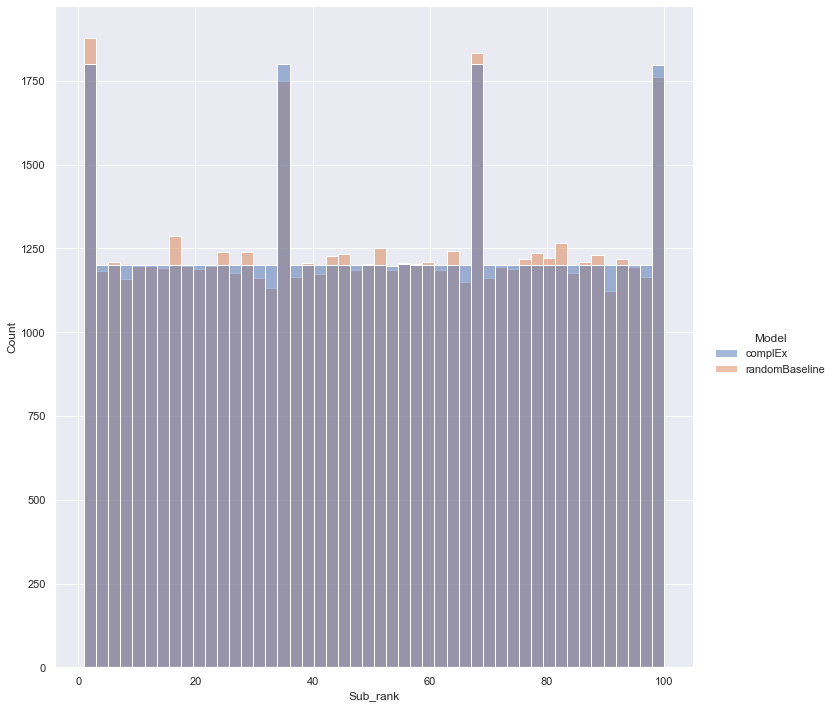

In [64]:
plt.figure(figsize = (15,8))
sns.displot(combined, x="Sub_rank", hue="Model", height=10)

<Figure size 1080x576 with 0 Axes>

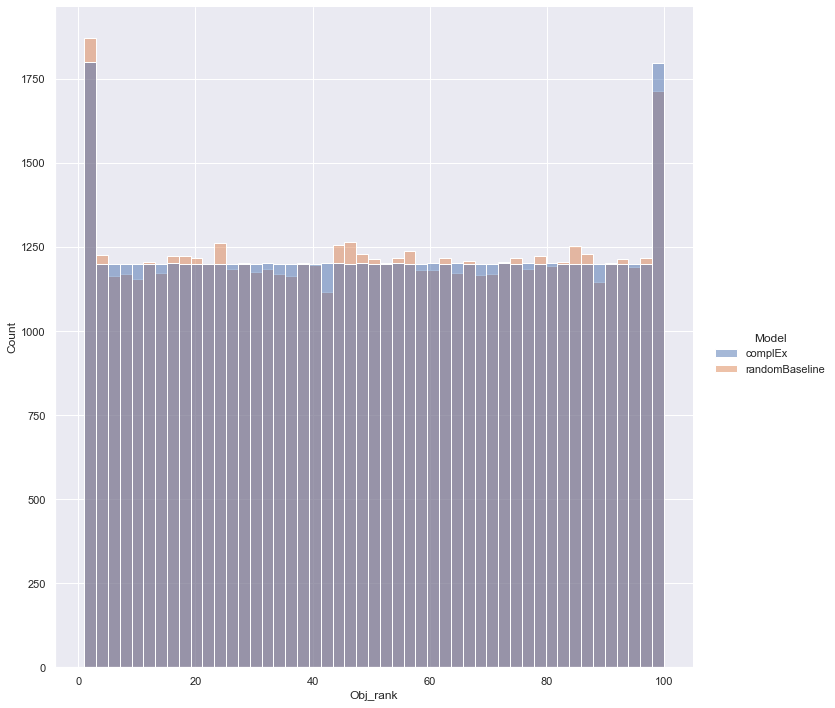

In [59]:
plt.figure(figsize = (15,8))
sns.displot(combined, x="Obj_rank", hue="Model", height=10)